In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
# converting the datset into dataframe
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
df = train_df.append(test_df)
# df = pd.read_csv("bbc-text.csv")

In [3]:
#defining the lenght of the train and test data
train_data_size = int(len(df)* .7)

In [4]:
# function for the spliting the dataset in 70% and 30% manner
def train_test_split(df, train_data_size):
    train_data = df[:train_data_size]
    test_data = df[train_data_size:]
    return train_data, test_data

In [6]:
#spliting the dataset and seperating out the for category and text
train_cat, test_cat = train_test_split(df['Category'], train_data_size)
train_text, test_text = train_test_split(df['Text'], train_data_size)

In [7]:
# tokenizing the text
# after that converting it into array
vector = CountVectorizer()
vector.fit(train_text)
vector.fit(test_text)
a = vector.transform(train_text)
b = vector.transform(test_text)
x_train = a.toarray()
x_test = b.toarray()

In [8]:
x_test.shape

(668, 17767)

In [9]:
# converting the lebels from string to number
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [10]:
# choosing the Random Forest Model. Because it reduces the overfitting and it has lower variance
model = RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True)

In [11]:
model.fit(x_train, y_train)

RandomForestClassifier(oob_score=True, warm_start=True)

In [12]:
# using the model for prediction on the test dataset
y_pred = model.predict(x_test)

In [13]:
#determinig out of the bag accuracy the accuracy of the model
accuracy = model.oob_score_

In [18]:
accuracy_score(y_pred, y_test)

0.18113772455089822

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
SVM.fit(x_train,y_train)
svm_predicted = SVM.predict(x_test)
print(accuracy_score(svm_predicted, y_test))

0.18413173652694612


In [15]:
# detremining the error of the model
error = 1 - model.oob_score_

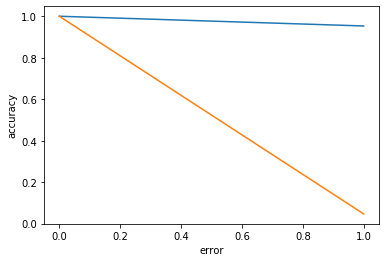

In [131]:
#ploting the graph in basis of accuracy an error
plt.plot([1,accuracy])
plt.plot([1,error])
plt.ylabel('accuracy')
plt.xlabel('error')
plt.show()